In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from trees import Tree, TPT

# Checking for accuracy on given example

Example from: https://proceedings.neurips.cc/paper_files/paper/2022/file/1bd6f17639876b4856026744932ec76f-Paper-Conference.pdf

<img src="tpt_example.png" width="600px">

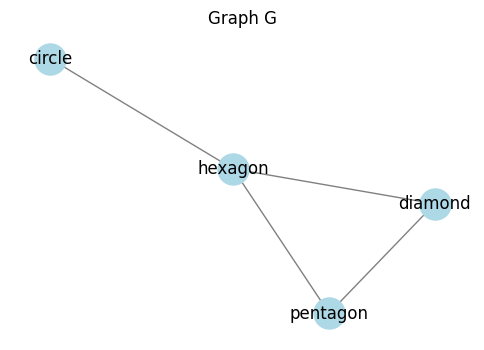

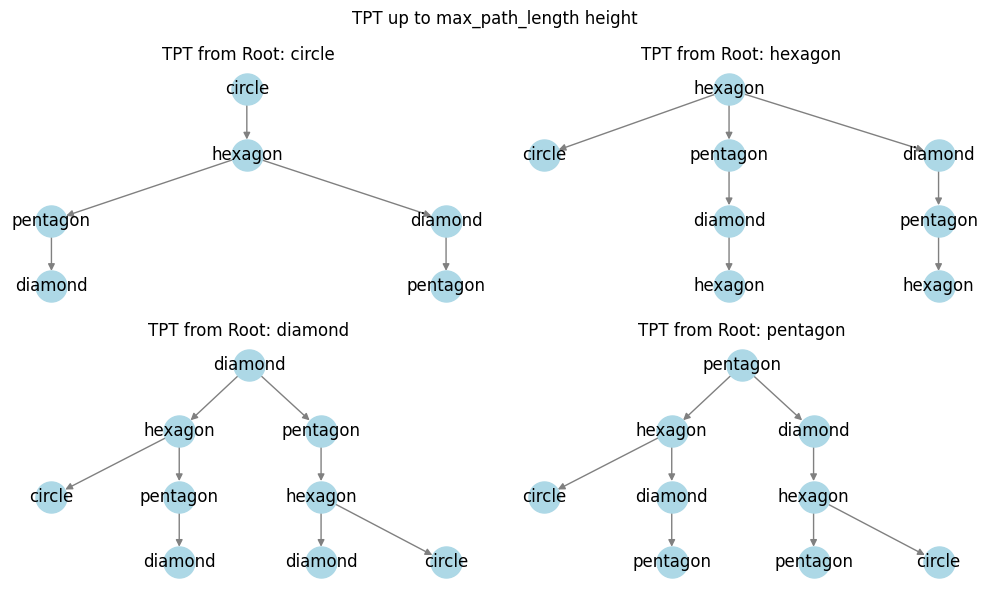

In [2]:
# Create an instance of the Graph class with the provided adjacency list
adjacency_list = {
    'circle': ['hexagon'],
    'hexagon': ['circle', 'pentagon', 'diamond'],
    'pentagon': ['hexagon', 'diamond'],
    'diamond': ['hexagon', 'pentagon']
}
possible_roots = ['circle', 'hexagon', 'diamond', 'pentagon']

G = nx.Graph()
# Add edges to the graph using a for loop
for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Plotting the graph G
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, ax=ax)
ax.set_title("Graph G")
plt.show()


# Plotting the TPT
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
max_height = 8
fig.suptitle(f'TPT up to max_path_length height')

shared_subtree_dict = {}
current_label_dict = {'current_label': 0}

for i in range(2):
    for j in range(2):
        root = possible_roots[i * 2 + j]
        tpt = TPT(G, root, max_height)
        tpt.plot_tree_with_ax(ax[i,j])

plt.tight_layout()
plt.show()


# Testing on other types of graphs

## Repeated Node Labels

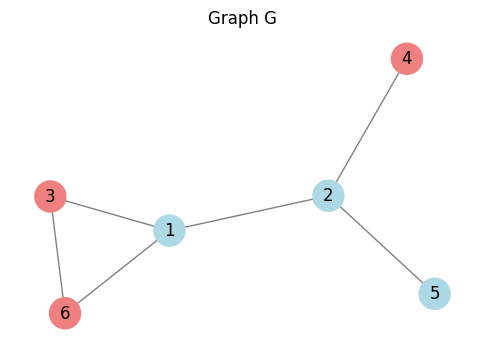

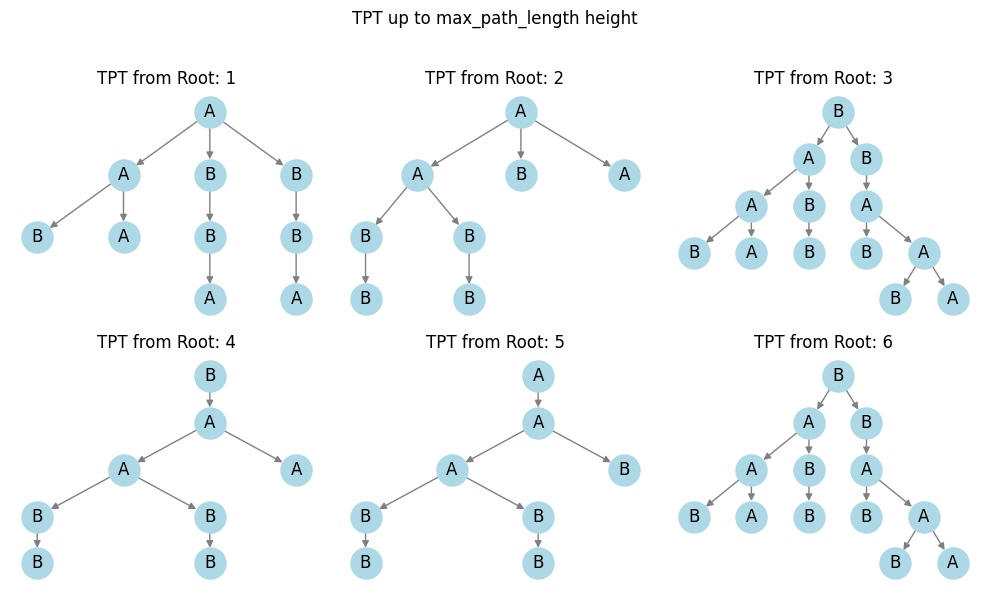

In [3]:
# Random adjacency list
adjacency_list = {
    '1': ['2', '3', '6'],
    '2': ['1', '4', '5'],
    '3': ['1', '6'],
    '4': ['2'],
    '5': ['2'],
    '6': ['3']
}

# Repeated node labels: A or B
node_labels = {
    '1': 'A',
    '2': 'A',
    '3': 'B',
    '4': 'B',
    '5': 'A',
    '6': 'B'
}

possible_roots = ['1', '2', '3', '4', '5', '6']

G = nx.Graph()
# Add edges to the graph using a for loop
for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Give different colors to the different labels so we visually check the TPTs
node_colors = ['lightblue' if node_labels[node] == 'A' else 'lightcoral' for node in G.nodes]

# Plotting the graph G
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, ax=ax)
ax.set_title("Graph G")
plt.show()

# Plotting the TPT
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
# max_height = 4
fig.suptitle(f'TPT up to max_path_length height')

for idx, root in enumerate(possible_roots):
    i, j = divmod(idx, 3)
    tpt = TPT(G, root)
    for node in tpt.tpt_tree.nodes():
        tpt.node_labels[node]['name'] = node_labels[node.split('-')[-1]]
    tpt.plot_tree_with_ax(axes[i, j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## No Node Labels

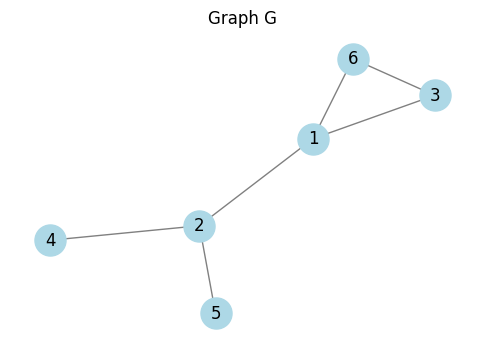

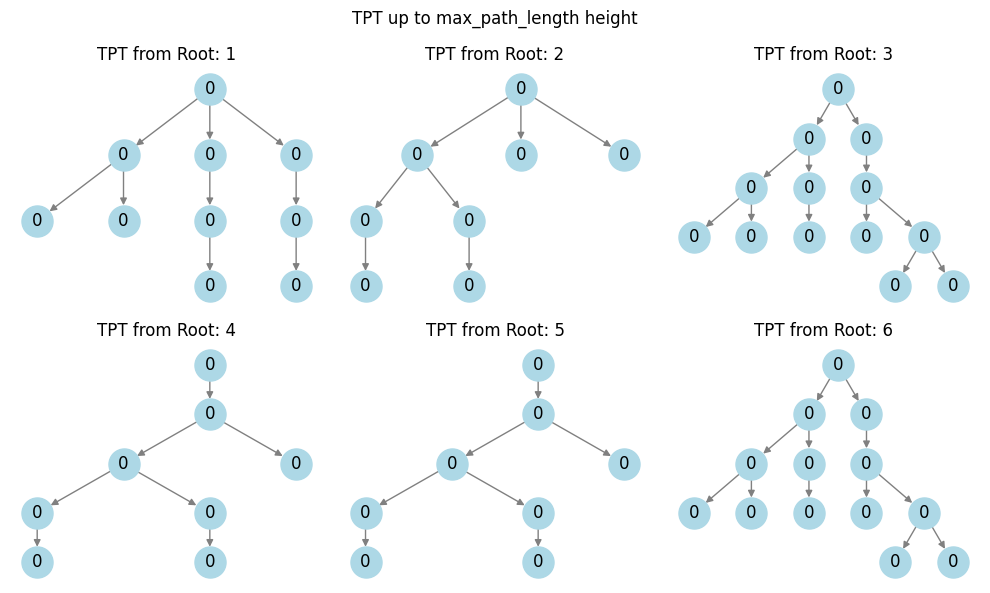

In [4]:
adjacency_list = {
    '1': ['2', '3', '6'],
    '2': ['1', '4', '5'],
    '3': ['1', '6'],
    '4': ['2'],
    '5': ['2'],
    '6': ['3']
}

possible_roots = ['1', '2', '3', '4', '5', '6']

G = nx.Graph()
# Add edges to the graph using a for loop
for node, neighbors in adjacency_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Plotting the graph G
fig, ax = plt.subplots(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, ax=ax)
ax.set_title("Graph G")
plt.show()

# Plotting the TPT
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle(f'TPT up to max_path_length height')

for i in range(2):
    for j in range(3):
        root = possible_roots[i * 3 + j]
        tpt = TPT(G, root)
        for node in tpt.tpt_tree.nodes():
            # Treat all nodes as having the same label '0'
            tpt.node_labels[node] = {'name': '0'}
        tpt.plot_tree_with_ax(axes[i, j])

plt.tight_layout()
plt.show()
